#### Data Preperation for Heart Disease Prediction

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [21]:
df=pd.read_csv('data\cleaned_stroke.csv')

In [22]:
df.shape

(5110, 11)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


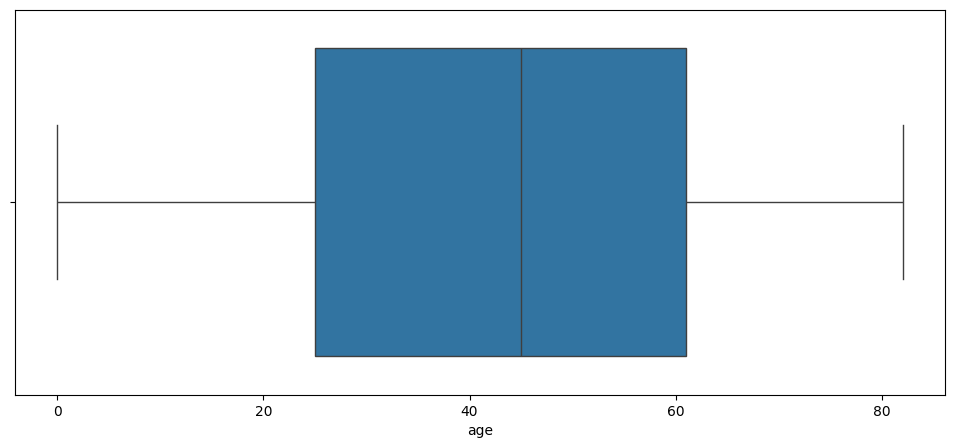

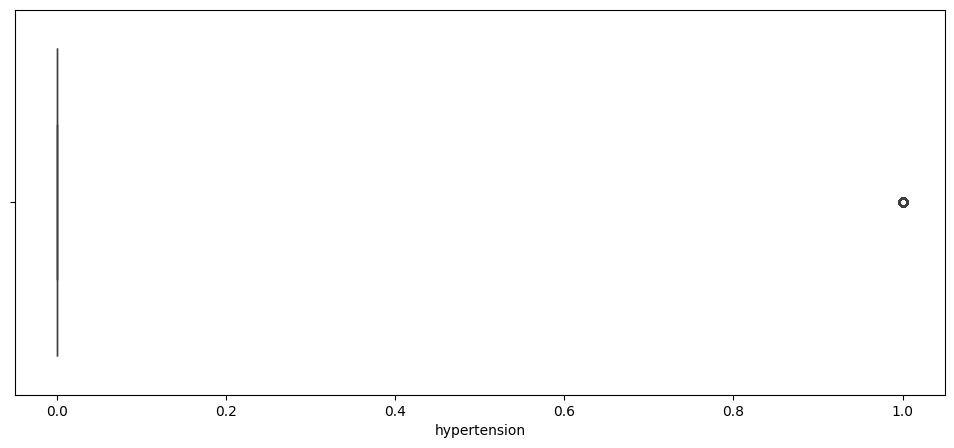

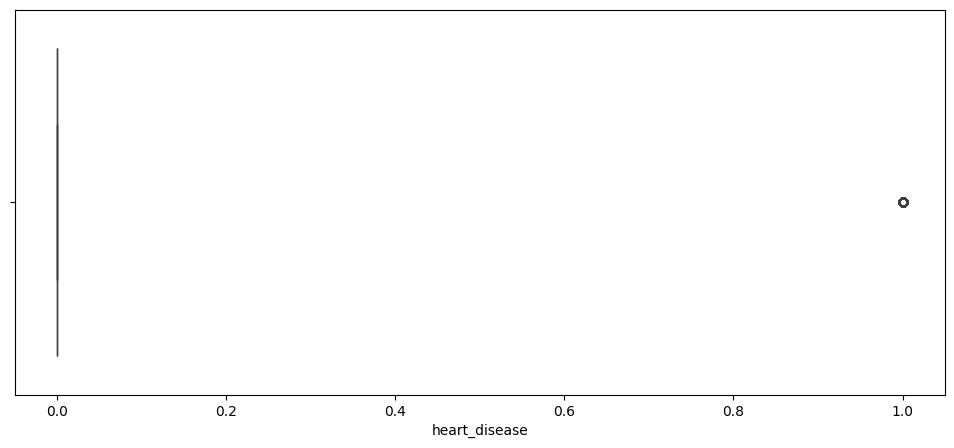

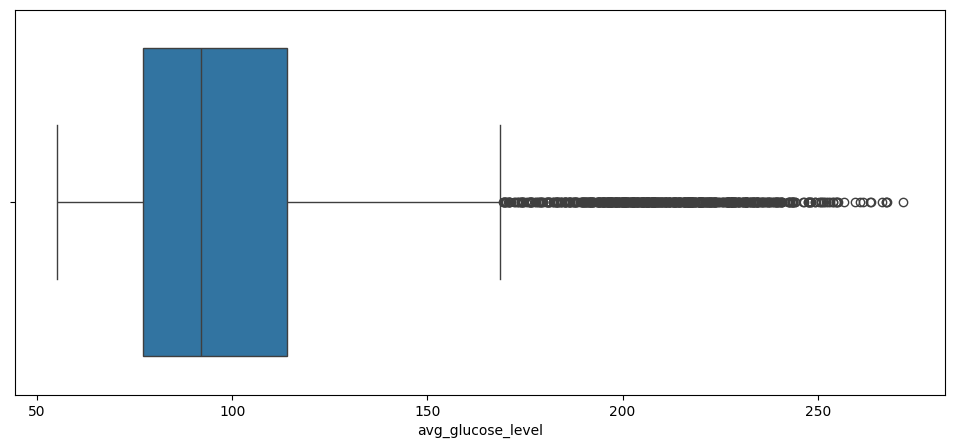

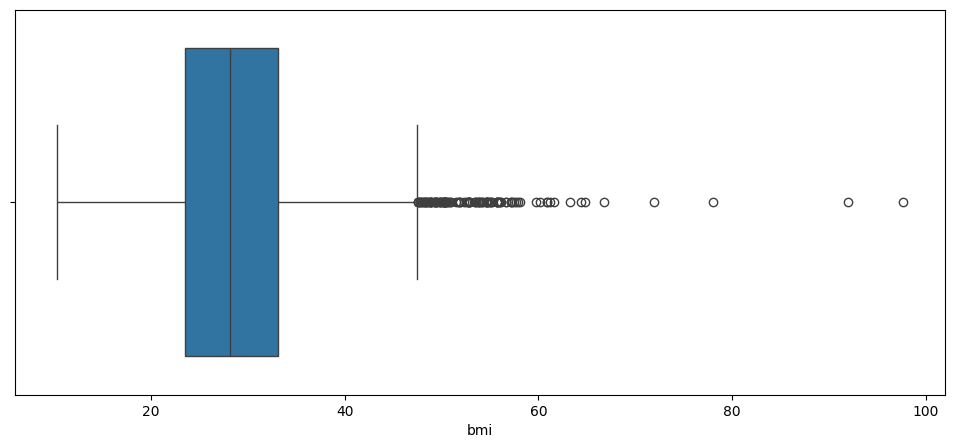

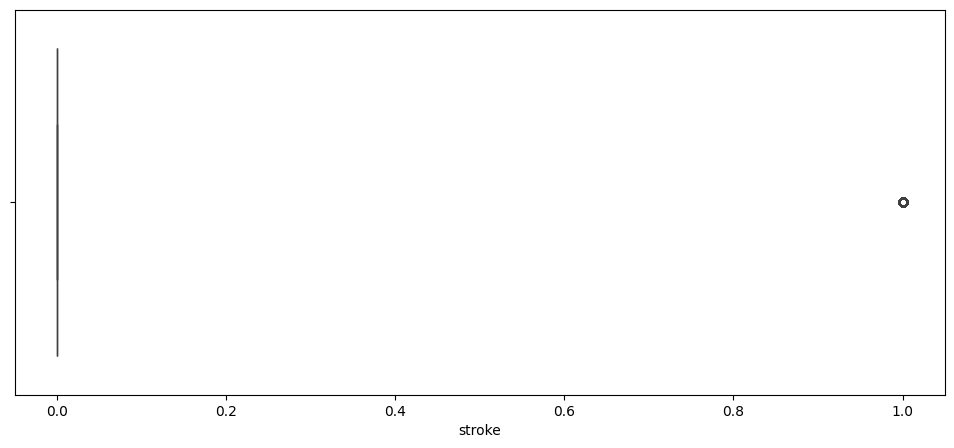

In [24]:
numerical_list = df.select_dtypes([np.number]).columns
for i in range(len(numerical_list)):
    plt.figure(figsize = (12, 5))
    sns.boxplot(x=df[numerical_list[i]])
 

In [25]:
outliers_list = ["avg_glucose_level", "bmi"]

In [26]:
df1 = df.copy()
def detect_outliers(col):
    print("Mean value ",df1[col].mean())
    print("Std value ",df1[col].std())
    print("Min value ",df1[col].min())
    print("Max value ",df1[col].max())
    print(df1.shape)
    # Finding the boundary values
    upper_bound = df1[col].mean() + 3*df1[col].std()
    lower_bound = df1[col].mean() - 3*df1[col].std()
    print("Highest allowed",upper_bound)
    print("Lowest allowed",lower_bound)
    # Finding the outliers with help of z score
    df1[col] = np.where(df1[col]>upper_bound, upper_bound, np.where(df1[col]<lower_bound,lower_bound,df1[col]))
    return df1[(df1[col] > upper_bound) | (df1[col] < lower_bound)]

In [39]:
detect_outliers("avg_glucose_level")

Mean value  105.68262190319693
Std value  44.5606587508768
Min value  55.12
Max value  241.9983575554641
(4993, 11)
Highest allowed 239.3645981558273
Lowest allowed -27.99935434943346


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


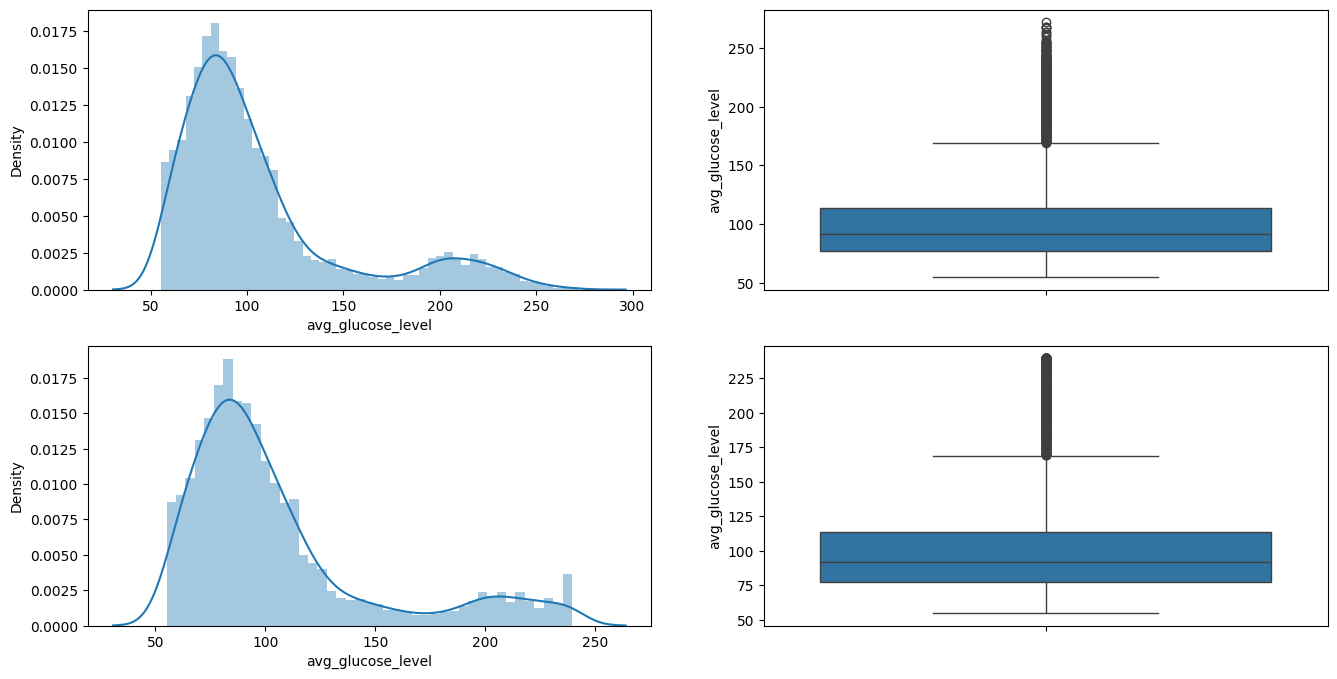

In [40]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['avg_glucose_level'])

plt.subplot(2,2,2)
sns.boxplot(df['avg_glucose_level'])

plt.subplot(2,2,3)
sns.distplot(df1['avg_glucose_level'])

plt.subplot(2,2,4)
sns.boxplot(df1['avg_glucose_level'])

plt.show()

In [29]:
import plotly.figure_factory as ff
# handling missing values
df1['bmi'].fillna(df1['bmi'].median(), inplace=True)
bmi = list(df1['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Red']
fig =ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

In [30]:
print("The shape before removing the BMI outliers : ",df1.shape)
df1.drop(df1[df1['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df1.shape)

The shape before removing the BMI outliers :  (5110, 11)
The shape after removing the BMI outliers :  (4993, 11)


#### Observation: The outliers of BMI index have been removed. Let us plot the distribution to see if it is still skewed

In [31]:
bmi = list(df1['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Red']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

In [32]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))
    plt.show()

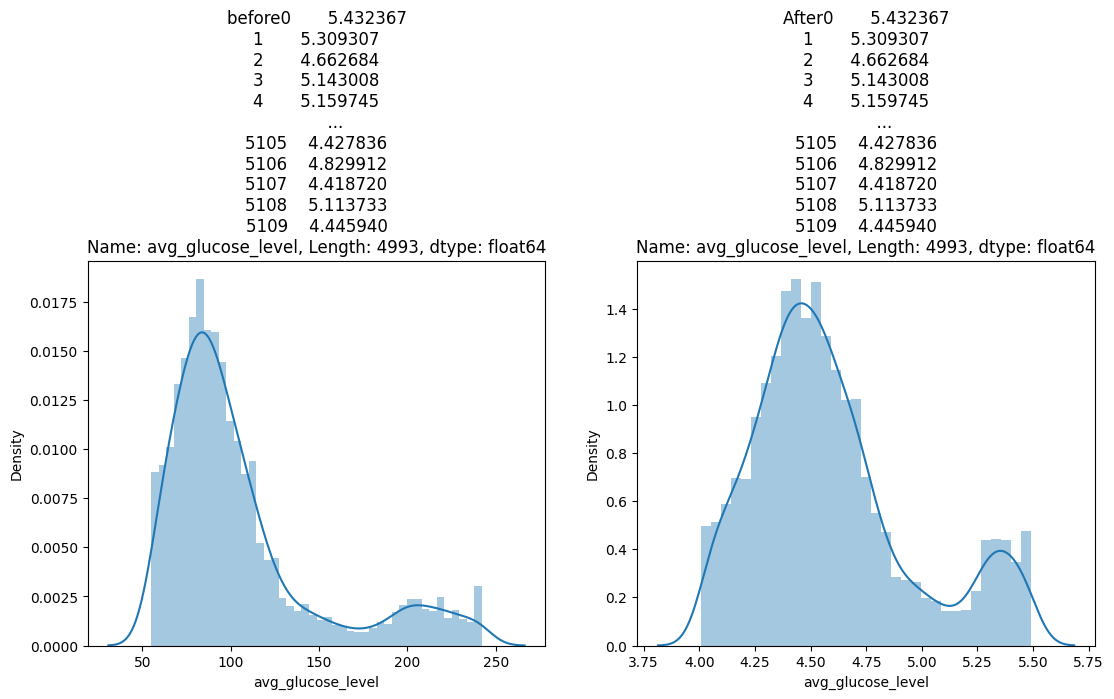

In [33]:
plots(df1,'avg_glucose_level',np.log(df1['avg_glucose_level']))

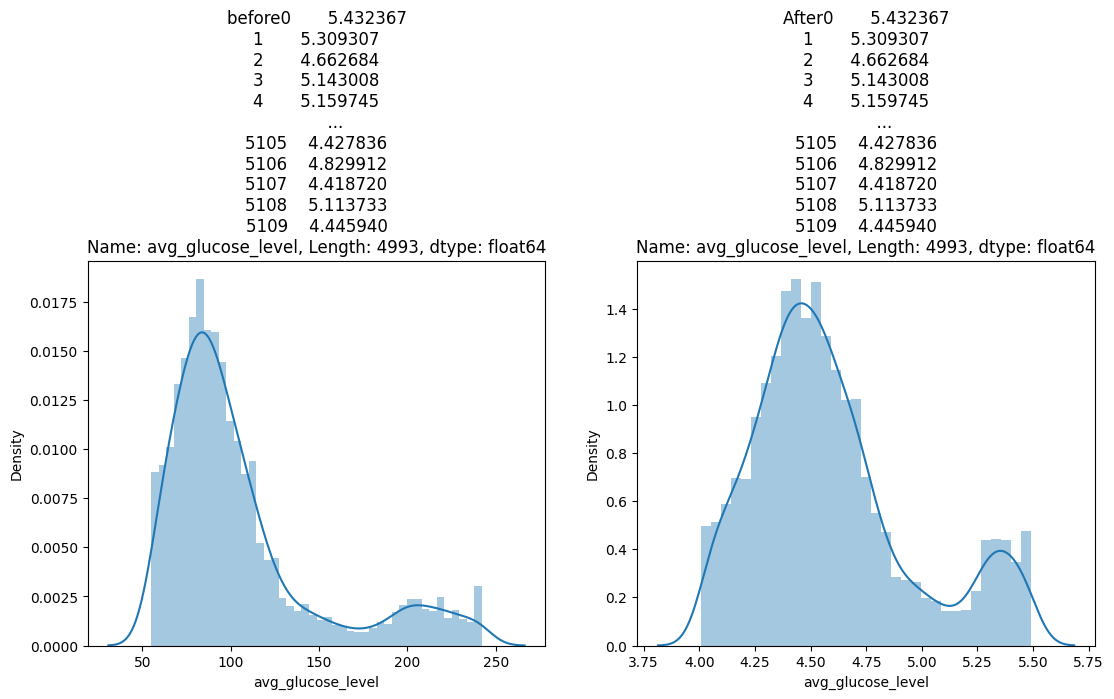

In [34]:
plots(df1,'avg_glucose_level',np.log(df1['avg_glucose_level']))

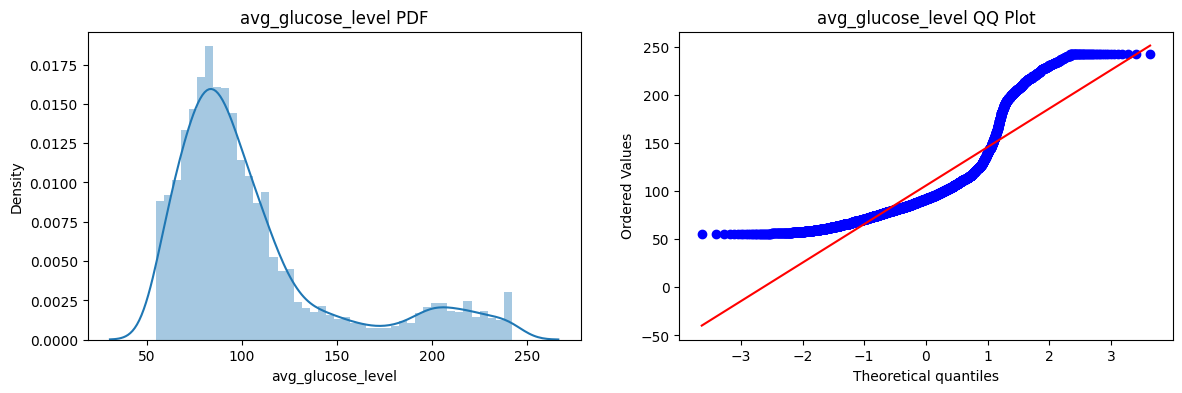

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df1['avg_glucose_level'])
plt.title('avg_glucose_level PDF')

plt.subplot(122)
stats.probplot(df1['avg_glucose_level'], dist="norm", plot=plt)
plt.title('avg_glucose_level QQ Plot')

plt.show()

In [36]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After' + str(t))

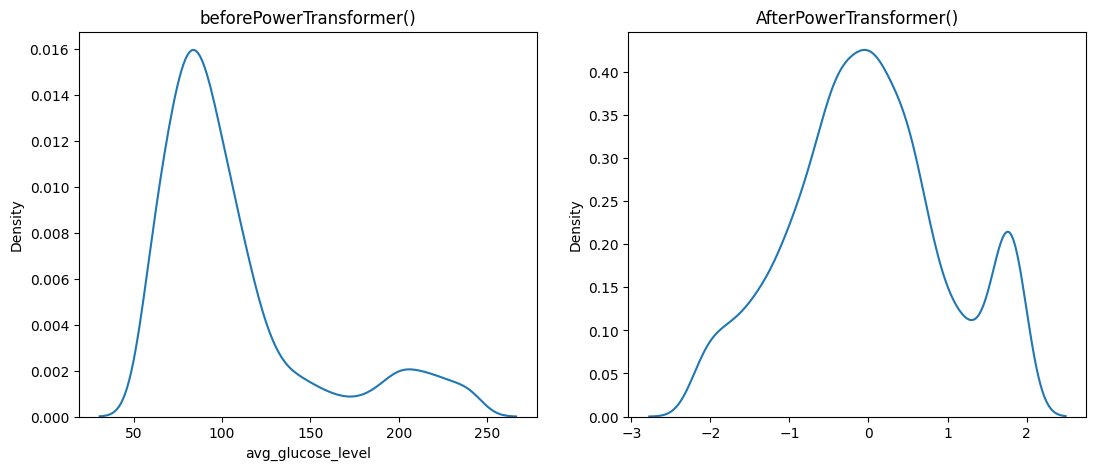

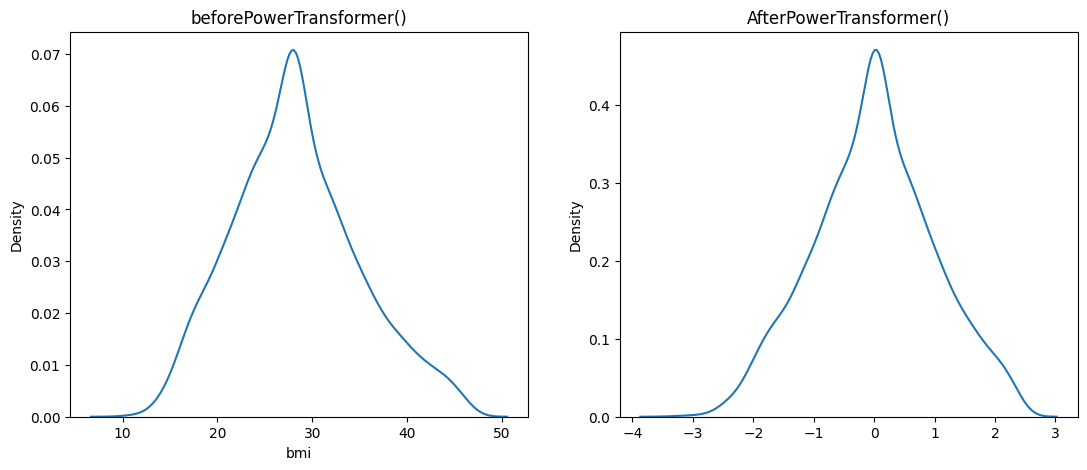

In [37]:
## Applying Yeo johnson as our datasets has some 0 values also
for col in ["avg_glucose_level", "bmi"]:
    plots(df1,col,PowerTransformer())

In [38]:
df1.to_csv('transformed.csv',index=False)